In [7]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

AttributeError: module 'matplotlib.pyplot' has no attribute 'cmap'

In [13]:
X,y = make_blobs(n_samples=30,centers=2,n_features=2,random_state=3)

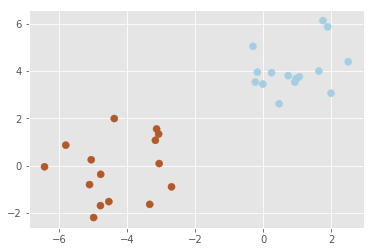

In [14]:
plt.scatter(X[:,0],X[:,1],s=50,c=y,cmap=plt.cm.Paired)

In [25]:
def plotBoundary(X, clf, mesh=True, boundary=True, type='predict', clim=(None, None)):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    if type == 'predict':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: # 'value', 'probability'
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        if type == 'predict':
            plt.pcolormesh(XX, YY, Z, zorder=-10)
        else:
            if type == "probability":
                Z = 1 / (1 + np.exp(-Z)) # sigmoid
            plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=plt.cm.bwr)
            plt.colorbar()
            plt.clim(clim[0], clim[1])

    if boundary:
        level = [0]
        if type == "probability":
            level = [0.5]
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=level)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [22]:
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
plotBoundary(X,clf)

NameError: name 'np' is not defined